# Plotting in Python

<a id='intro'></a>
## Introduction

This notebook discusses the main features of [MatPlotLib](http://www.matplotlib.org/) (`matplotlib`) and other related plotting packages in a scientific computing context.

Although any installation of [IPython](http://ipython.org/) will work with a version of this notebook, we recommend that you download and install [Anaconda](https://continuum.io/downloads) Python.  To launch the notebook, open a command terminal, type `ipython notebook tutorial.ipynb`, and press Return.

A few notes on this tutorial:

- The code in this tutorial is written for Python 3, so if you have Python 2 then you may need to make some sensible modifications.

- Code blocks starting with `$` are intended to be run on the command line, not executed as Python code.

## Contents
- [Introduction](#intro)
- [Plotting in 2D:  `matplotlib`](#mpl)
    - [Professional Plotting](#prof)
    - [Animating Plots](#anim)
- [Prettier Plotting (`seaborn`)](#pretty)
    - [Palettes](#palettes)
- [More Professional Plotting](#prof-more)
- [References](#refs)
- [Credits](#credits)

#### Standard Header

As we will be utilizing a number of packages with reasonably long names, we will adopt the _de facto_ standard module abbreviations in the following header.  We also ensure that our [division behavior is sensible](http://www.python.org/dev/peps/pep-0238/) by importing from `__future__`:  _i.e._, promotion to `double` will occur from `int` or `long` data types involving division:  `1/2 == 0.5`.  Although this is the default in Python 3, it is a trivial way to help this notebook work in Python 2 if that's what you are using.

In [6]:
from __future__ import division, print_function

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[15,3]

---
<a id='mpl'></a>
## Plotting in 2D:  `matplotlib`

Thus far you have seen the use of a cryptic (or not-so-cryptic) `plt.plot` command many times.  Its syntax is quite similar to the MATLAB `plot` command; indeed, you can even load it with `from matplotlib.pyplot import plot` to save yourself much typing in the future.

`plot` displays coordinate pairs in a number of formats.  It is currently the workhorse of 2D plotting in Python, and the MATLAB-like syntax will make basic manipulation accessible to many engineers.

There are a number of alternative display commands as well which tweak the output:  `fill` and `errorbar`, for instance.  The MatPlotLib developers maintain a [gallery](http://matplotlib.org/gallery.html) of examples with full source code.

You have access to the [entire palette](http://matplotlib.org/api/colors_api.html) of modern systems as well.

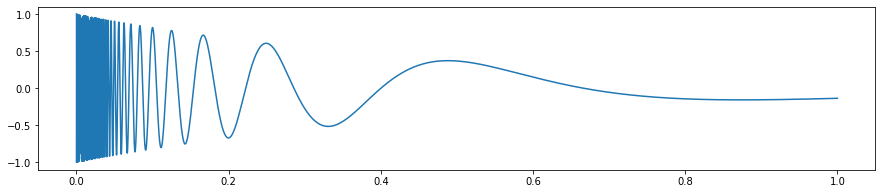

In [7]:
x = np.linspace(1e-6, 1, 10001)
y = np.cos(np.pi/x) * np.exp(-2*x)

plt.plot(x, y)
plt.show()

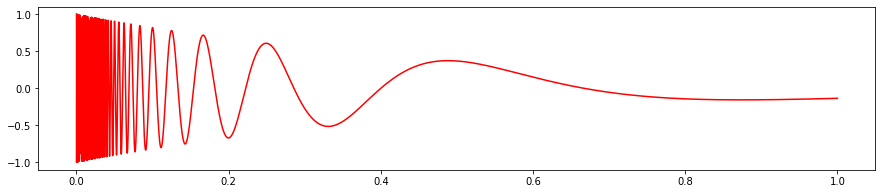

In [12]:
plt.plot(x, y, 'r--')

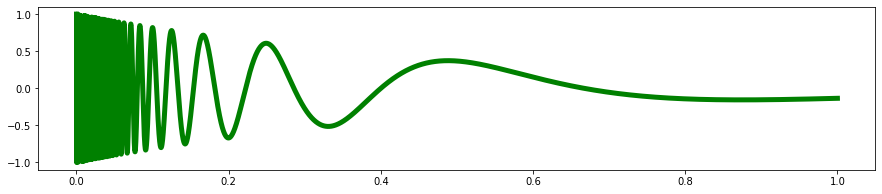

In [14]:
plt.plot(x, y, 'g-', linewidth=5)

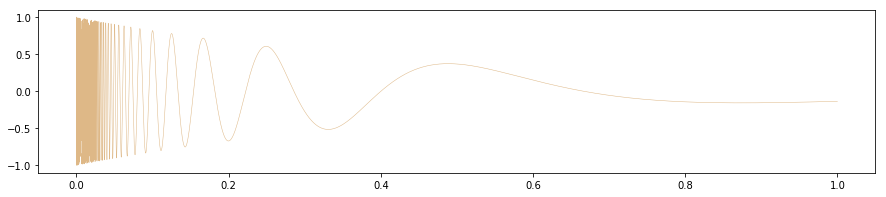

In [30]:
plt.plot(x, y, linewidth=0.5, color='burlywood')

(0, 1)

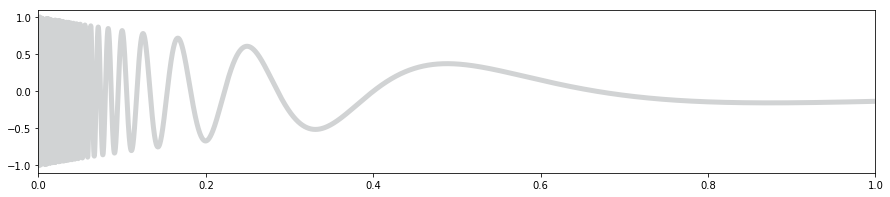

In [31]:
plt.plot(x, y, linewidth=5, color='#d1d3d4')
plt.xlim(0, 1)

#### Exercise

* Plot the following equations over the domain $y \in \left[-1, 2\right]$.
    * $y = f(x) = x^2 \exp(-x)$
    * $y = f(x) = \log x$
    * $y = f(x) = 1 + x^x + 3 x^4$

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


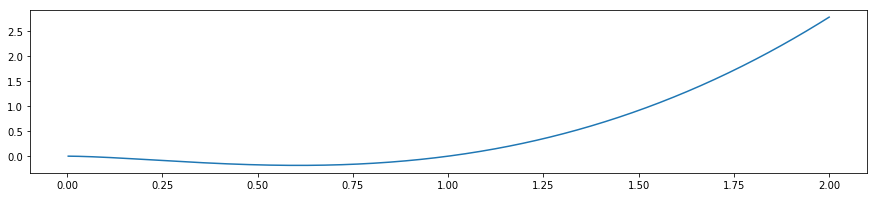

In [32]:
x = np.linspace(-1,2,1000)
y = x**2*np.log(x)
plt.plot(x,y)

---
### Color

In [33]:
# Named MPL colors
for c in mpl.colors.cnames:
    print(c, mpl.colors.cnames[c])

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


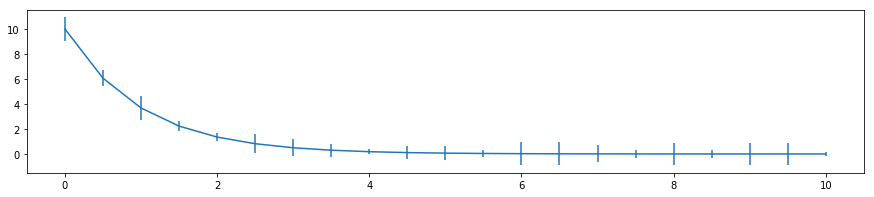

In [34]:
x = np.linspace(0, 10, 21)
y = 10*np.exp(-x)
yerr = np.random.rand(len(x))

plt.errorbar(x, y, yerr=yerr)
plt.show()

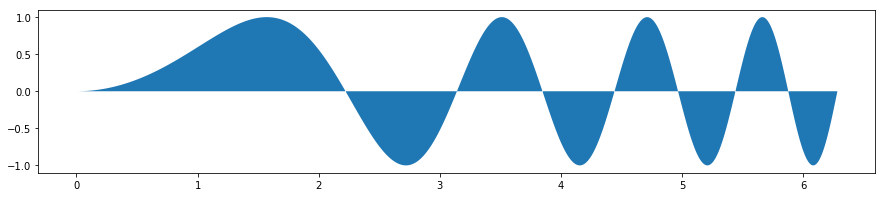

In [35]:
x = np.linspace(0, 2*np.pi, 1001)
y = np.sin(2*x**2/np.pi)

plt.fill(x, y)
plt.show()

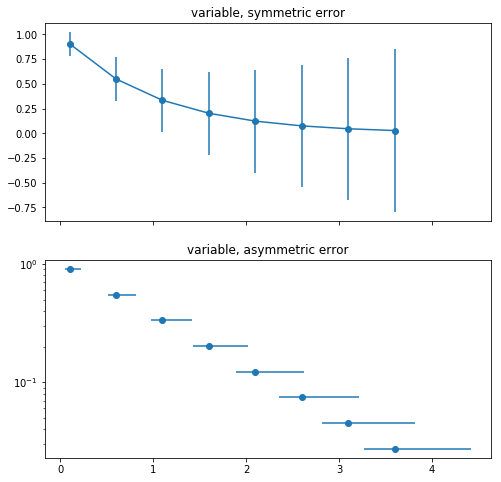

In [36]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

y_err = 0.1 + 0.2 * x
x_err_lower = 0.4 * y_err
x_err_upper = y_err
x_err = [x_err_lower, x_err_upper]

mpl.rcParams['figure.figsize']=[8,8]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=y_err, fmt='-o')
ax0.set_title('variable, symmetric error')

ax1.errorbar(x, y, xerr=x_err, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

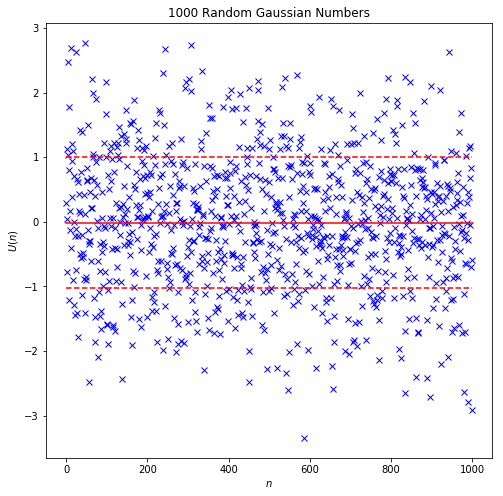

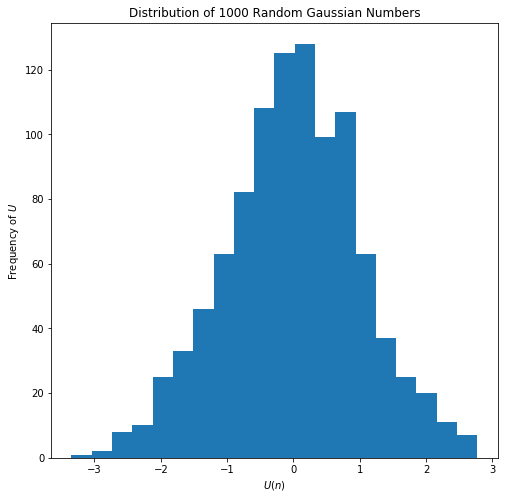

In [37]:
from numpy.random import normal
n = (1000,1)
x = normal(size=n)

avg = np.mean(x)
std = np.std(x)

x_avg  = np.ones(n)* avg
x_stdl = np.ones(n)*(avg-std)
x_stdh = np.ones(n)*(avg+std)

plt.plot(x,'bx',x_avg,'r-',x_stdl,'r--',x_stdh,'r--')
plt.title('%d Random Gaussian Numbers' % n[0]);
plt.xlabel(r'$n$');
plt.ylabel(r'$U(n)$')
plt.show()

plt.hist(x,bins=20)
plt.title('Distribution of %d Random Gaussian Numbers' % n[0]);
plt.xlabel(r'$U(n)$');
plt.ylabel(r'Frequency of $U$')
plt.show()

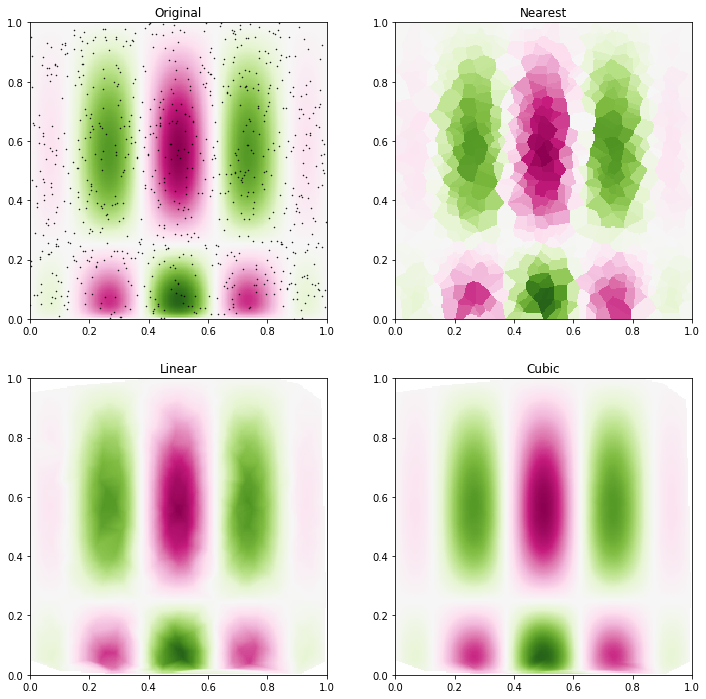

In [38]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(2*np.pi*np.sqrt(y))

# Define the basic grid coordinates.
grid_x, grid_y = np.mgrid[0:1:250j, 0:1:250j]

# Define a random subset of the grid for which we will generate data.
pts = np.random.rand(800,2)
vals = func(pts[:,0], pts[:,1])

# Load the methods and generate a grid for each approach.
from scipy.interpolate import griddata
grid_z0 = griddata(pts, vals, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(pts, vals, (grid_x, grid_y), method='linear')
grid_z2 = griddata(pts, vals, (grid_x, grid_y), method='cubic')

from matplotlib import cm
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.plot(pts[:,0], pts[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.title('Cubic')

plt.gcf().set_size_inches(12, 12)
plt.show()

- Play around with some other functions in the cell above's `func`.

---
<a id='prof'></a>
### Professional Plotting

Using standard commands, you can easily design publication-quality output.  (This is one place where an interactive shell like IPython really shines.)  You can save the figures as high-resolution PNGs (or other file types).  You can even use $\LaTeX$ markup in raw Python strings to yield mathematical formulae in labels, titles, and legends.

In [39]:
mpl.rcParams['figure.figsize']=[15,3]

T_0(x) = poly([1.])
T_1(x) = poly([0. 1.])
T_2(x) = poly([-1.  0.  2.])
T_3(x) = poly([ 0. -3.  0.  4.])
T_4(x) = poly([ 1.  0. -8.  0.  8.])
T_5(x) = poly([  0.   5.   0. -20.   0.  16.])


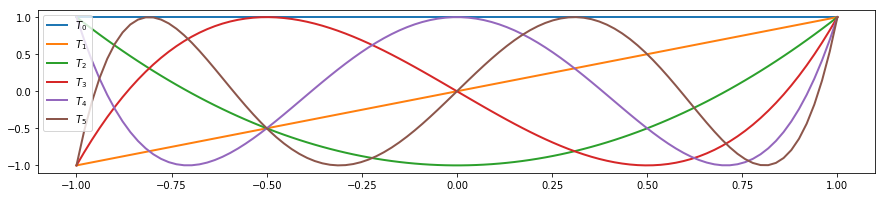

In [40]:
from numpy.polynomial import Chebyshev as T
from numpy.polynomial import Polynomial as P
x = np.linspace(-1, 1, 100)
for i in range(6):
    ax = plt.plot(x, T.basis(i)(x), lw=2, label=r'$T_%d$'%i)
    print(r'T_%d(x) = %s'%(i, T.basis(i).convert(kind=P)))
plt.legend(loc="upper left")
plt.savefig('chebyshev.png', dpi=120, transparent=True)
plt.show()

L_0(x) = poly([1.])
L_1(x) = poly([ 1. -1.])
L_2(x) = poly([ 1.  -2.   0.5])
L_3(x) = poly([ 1.         -3.          1.5        -0.16666667])
L_4(x) = poly([ 1.         -4.          3.         -0.66666667  0.04166667])
L_5(x) = poly([ 1.         -5.          5.         -1.66666667  0.20833333 -0.00833333])


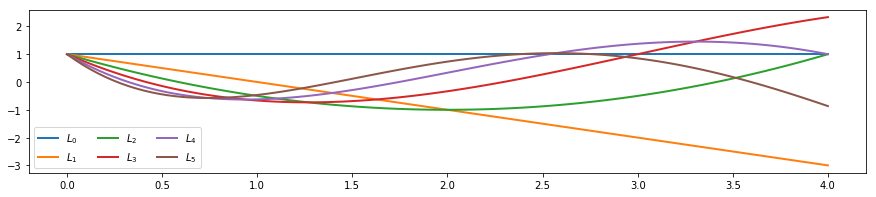

In [41]:
from numpy.polynomial import Laguerre as L
x = np.linspace(0, 4, 100)
for i in range(6):
    ax = plt.plot(x, L.basis(i)(x), lw=2, label=r'$L_%d$'%i)
    print(r'L_%d(x) = %s'%(i, L.basis(i).convert(kind=P)))
plt.legend(loc="lower left",ncol=3)
plt.savefig('laguerre.png', dpi=120, transparent=True)
plt.show()

- Experiment with the following $\LaTeX$ labels in the `label` argument in the following code block.  (They won't describe the figure, but whatever...)
    - `r'A_i^j (x)$'`
    - `r'$(1 - x_0) \cdot x^{x^x}$'`
    - `r'$\frac{x + y}{x^y}$'`
    - `r'$\int_0^\infty \exp(-x) dx$'`
    - `r'$\sum_{n=0}^{10} \frac{x}{x-5}$'`
    - `r'$\pi = %f$'%np.pi`

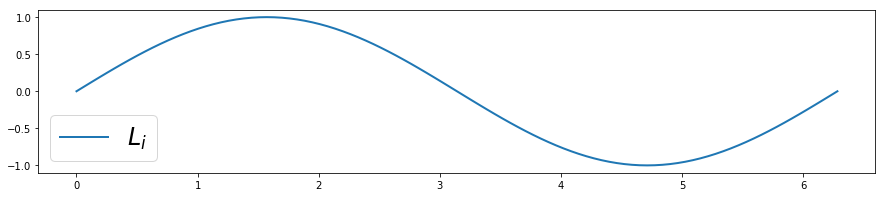

In [42]:
x = np.linspace(0, 2*np.pi, 101)
plt.plot(x, np.sin(x), lw=2, label=r'$L_i$')
plt.legend(loc="lower left", prop={'size':24})
plt.show()

To get plots really looking sharp, you need to adjust the labels, font sizes, typefaces, and other plot properties for readability.

In [43]:
from scipy.special import jv, yv, iv, kv, jn_zeros
x = np.linspace(0, 6, 201)
y = np.zeros((8, 201))
y[0,:] = jv(0, x)
y[1,:] = jv(1, x)
y[2,:] = yv(0, x)
y[3,:] = yv(1, x)
y[4,:] = iv(0, x)
y[5,:] = iv(1, x)
y[6,:] = kv(0, x)
y[7,:] = kv(1, x)

mpl.rcParams['figure.figsize']=[15,6]

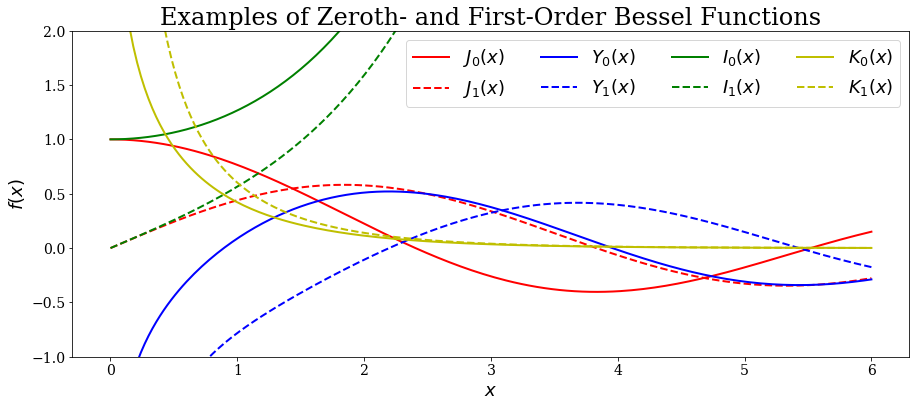

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y[0], 'r-', lw=2, label=r'$J_0(x)$')
ax.plot(x, y[1], 'r--', lw=2, label=r'$J_1(x)$')
ax.plot(x, y[2], 'b-', lw=2, label=r'$Y_0(x)$')
ax.plot(x, y[3], 'b--', lw=2, label=r'$Y_1(x)$')
ax.plot(x, y[4], 'g-', lw=2, label=r'$I_0(x)$')
ax.plot(x, y[5], 'g--', lw=2, label=r'$I_1(x)$')
ax.plot(x, y[6], 'y-', lw=2, label=r'$K_0(x)$')
ax.plot(x, y[7], 'y--', lw=2, label=r'$K_1(x)$')

ax.set_title(r'Examples of Zeroth- and First-Order Bessel Functions', fontsize=24, family='serif')
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylim((-1, 2))

from matplotlib import font_manager as fm
ticks_font = fm.FontProperties(family='serif', size=14)
for label in ax.get_xticklabels(): label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels(): label.set_fontproperties(ticks_font)

ax.legend(loc='best', prop={'size':18}, ncol=4) #you often have to oversize LaTeX code to make it look right in MPL

plt.savefig('bessel.png', dpi=120, transparent=True)
plt.show()

There are a few situations when you may want your plots to be in black and white, such as publication in a journal or when your article may be photocopied.

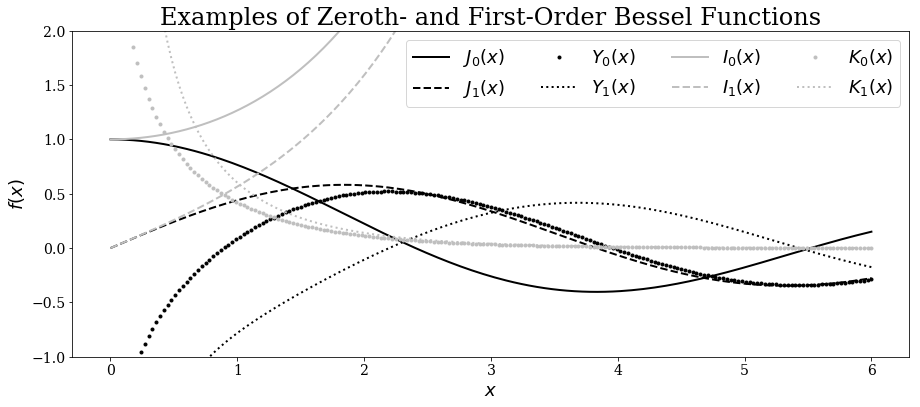

In [45]:
# the only difference here is that we set the lines to grayscale for publication purposes
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y[0], 'k-', lw=2, label=r'$J_0(x)$')
ax.plot(x, y[1], 'k--', lw=2, label=r'$J_1(x)$')
ax.plot(x, y[2], 'k.', lw=2, label=r'$Y_0(x)$')
ax.plot(x, y[3], 'k:', lw=2, label=r'$Y_1(x)$')
ax.plot(x, y[4], '-', color=(0.75,0.75,0.75), lw=2, label=r'$I_0(x)$')
ax.plot(x, y[5], '--', color=(0.75,0.75,0.75), lw=2, label=r'$I_1(x)$')
ax.plot(x, y[6], '.', color=(0.75,0.75,0.75), lw=2, label=r'$K_0(x)$')
ax.plot(x, y[7], ':', color=(0.75,0.75,0.75), lw=2, label=r'$K_1(x)$')

ax.set_title(r'Examples of Zeroth- and First-Order Bessel Functions', fontsize=24, family='serif')
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylim((-1, 2))

from matplotlib import font_manager as fm
ticks_font = fm.FontProperties(family='serif', size=14)
for label in ax.get_xticklabels(): label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels(): label.set_fontproperties(ticks_font)

ax.legend(loc='best', prop={'size':18}, ncol=4) #you often have to oversize LaTeX code to make it look right in MPL

plt.savefig('bessel.png', dpi=120, transparent=True)
plt.show()

Additionally, accomodating color blindness is a common motivation for choosing a nonstandard palette.

[ColorBrewer](http://colorbrewer2.org/#) presents color palettes with a number of filters such as print-friendliness and visibility for the color blind.

ValueError: x and y must have same first dimension, but have shapes (10001,) and (1,)

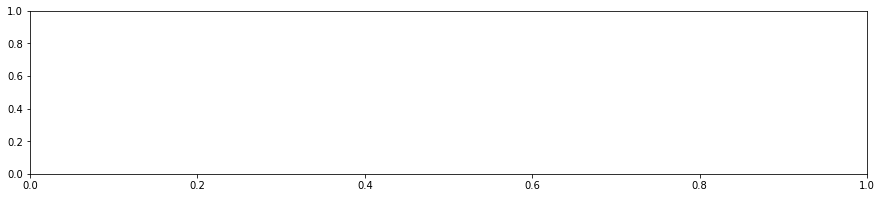

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y[0], '-', color='#b2182b', lw=2, label=r'$J_0(x)$')
ax.plot(x, y[1], '-', color='#d6604d', lw=2, label=r'$J_1(x)$')
ax.plot(x, y[2], '-', color='#f4a582', lw=2, label=r'$Y_0(x)$')
ax.plot(x, y[3], '-', color='#fddbc7', lw=2, label=r'$Y_1(x)$')
ax.plot(x, y[4], '-', color='#2166ac', lw=2, label=r'$I_0(x)$')
ax.plot(x, y[5], '-', color='#4393c3', lw=2, label=r'$I_1(x)$')
ax.plot(x, y[6], '-', color='#92c5de', lw=2, label=r'$K_0(x)$')
ax.plot(x, y[7], '-', color='#d1e5f0', lw=2, label=r'$K_1(x)$')

ax.set_title(r'Examples of Zeroth- and First-Order Bessel Functions', fontsize=24, family='serif')
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylim((-1, 2))

from matplotlib import font_manager as fm
ticks_font = fm.FontProperties(family='serif', size=14)
for label in ax.get_xticklabels(): label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels(): label.set_fontproperties(ticks_font)

ax.legend(loc='best', prop={'size':18}, ncol=4) #you often have to oversize LaTeX code to make it look right in MPL

plt.savefig('bessel.png', dpi=120, transparent=True)
plt.show()

---
<a id='anim'></a>
### Animating Plots

The modes of vibration of a drum are the orthogonal basis functions which uniquely describe any vibration on a struck drumhead.

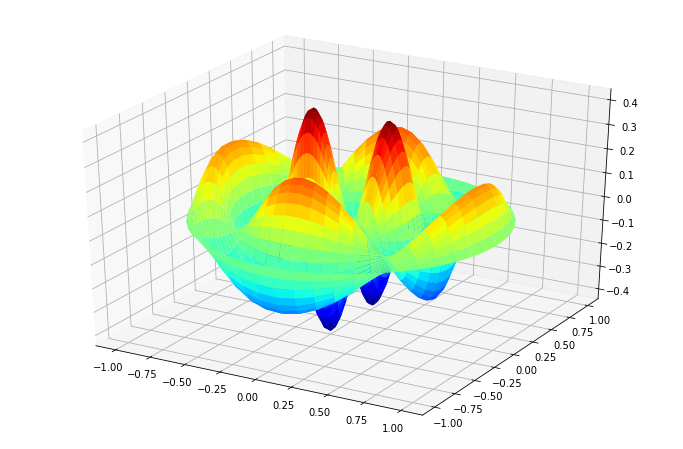

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import jn, jn_zeros
mpl.rcParams['figure.figsize']=[12,8]

def drumhead_height(n, k, distance, angle, t):
    nth_zero = jn_zeros(n, k)
    return np.cos(t)*np.cos(n*angle)*jn(n, distance*nth_zero[-1])

# Define polar and cartesian coordinates for the drum.
theta  = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r*np.cos(theta) for r in radius])
y = np.array([r*np.sin(theta) for r in radius])

radial_nodes  = 2
zeros = 3

# Define the base plot.
fig = plt.figure()

# Display the desired angular nodes.
ax = fig.add_subplot(1,1,1,projection='3d')
z = np.array([drumhead_height(radial_nodes, zeros, r, theta, 0.5) for r in radius])
ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap=mpl.cm.jet)

plt.show()

Let's display several at once.

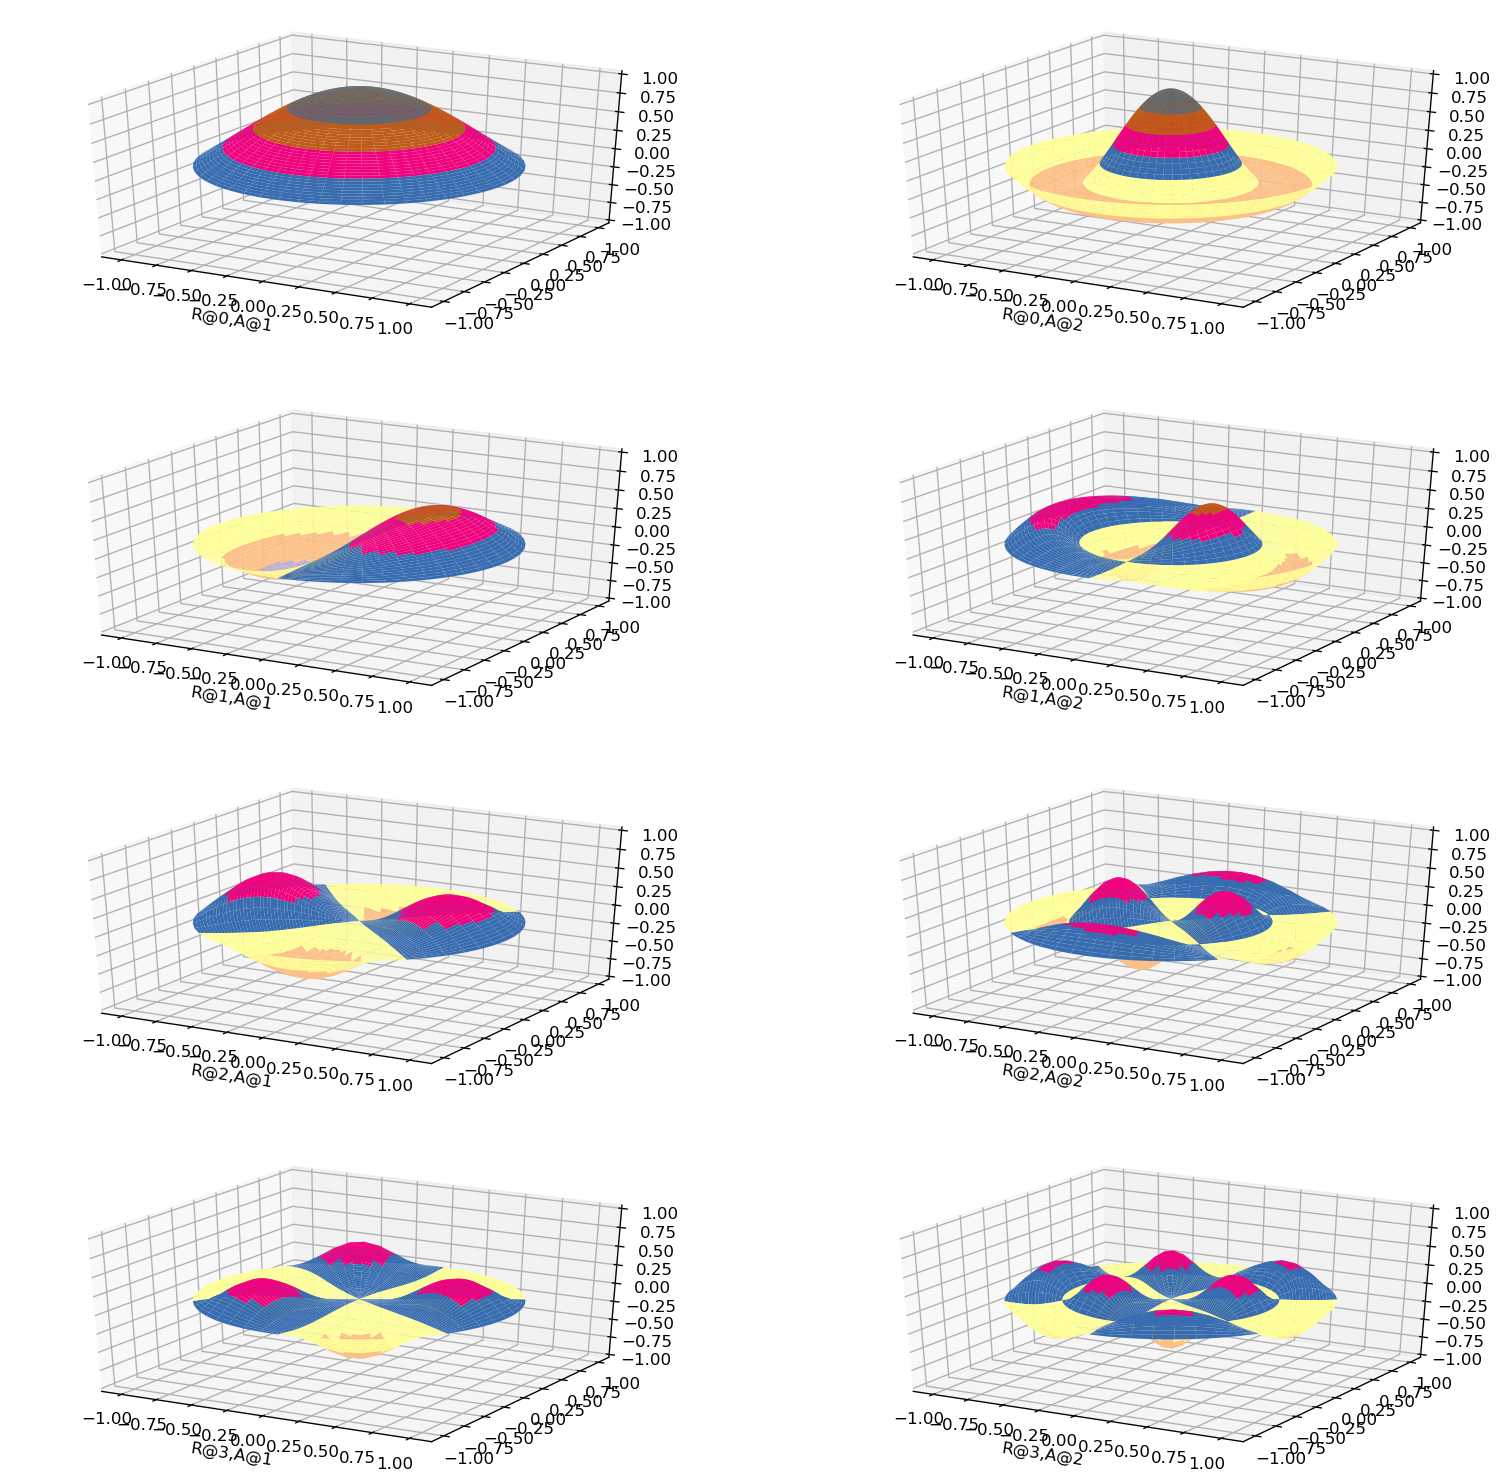

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import jn, jn_zeros
import subprocess

def drumhead_height(n, k, distance, angle, t):
    nth_zero = jn_zeros(n, k)
    return np.cos(t)*np.cos(n*angle)*jn(n, distance*nth_zero[-1])

# Define polar and cartesian coordinates for the drum.
theta  = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r*np.cos(theta) for r in radius])
y = np.array([r*np.sin(theta) for r in radius])

radial_nodes = 3
zeros = 2

# Define the base plot.
fig = plt.figure(num=None,figsize=(16,16),dpi=120,facecolor='w',edgecolor='k')
ax = list()

# Loop over the desired angular nodes.
cnt = 0
pixcnt = 0

t = 0
cnt = 0
pixcnt += 1
for i in np.r_[0:radial_nodes+1:1]:
    for j in np.r_[1:zeros+1:1]:
        cnt += 1;
        ax.append(fig.add_subplot(radial_nodes+1,zeros,cnt,projection='3d'))
        z = np.array([drumhead_height(i, j, r, theta, t) for r in radius])
        ax[-1].set_xlabel('R@%d,A@%d' % (i,j))
        ax[-1].plot_surface(x,y,z,rstride=1,cstride=1,cmap=mpl.cm.Accent,linewidth=0,vmin=-1,vmax=1)
        ax[-1].set_zlim(-1,1)
plt.show()

We could then write them to disk sequentially.

<div class = "alert alert-danger">
**Warning**
<br/>
This may take several minutes to complete, so you can opt not to run it.  If you have started it and want to interrupt the execution of the cell, select *Kernel→Interrupt* from the menu above.
</div>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import jn, jn_zeros
import subprocess

def drumhead_height(n, k, distance, angle, t):
    nth_zero = jn_zeros(n, k)
    return np.cos(t)*np.cos(n*angle)*jn(n, distance*nth_zero[-1])

# Define polar and cartesian coordinates for the drum.
theta  = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r*np.cos(theta) for r in radius])
y = np.array([r*np.sin(theta) for r in radius])

radial_nodes = 3
zeros = 2

# Define the base plot.
fig = plt.figure(num=None,figsize=(16,16),dpi=120,facecolor='w',edgecolor='k')
ax = list()

# Loop over the desired angular nodes.
cnt = 0
pixcnt = 0
#plt.ion()
for t in np.r_[0:2*np.pi:40j]:
    cnt = 0
    pixcnt += 1
    for i in np.r_[0:radial_nodes+1:1]:
        for j in np.r_[1:zeros+1:1]:
            cnt += 1;
            ax.append(fig.add_subplot(radial_nodes+1,zeros,cnt,projection='3d'))
            z = np.array([drumhead_height(i, j, r, theta, t) for r in radius])
            ax[-1].set_xlabel('R@%d,A@%d' % (i,j))
            ax[-1].plot_surface(x,y,z,rstride=1,cstride=1,cmap=mpl.cm.Accent,linewidth=0,vmin=-1,vmax=1)
            ax[-1].set_zlim(-1,1)
    #plt.show()
    plt.savefig('./drum-modes-%d.png' % pixcnt, format='png')

Finally, we could collect them as an animated GIF using the following code.

In [ ]:
# Collate pictures to an animated GIF.
import os,string
cwd = os.getcwd()
cmd = 'cd %s; ls drum-modes*.png | sort -k1.12n'%cwd
png_files = os.popen(cmd)
png_files_list = string.join(png_files.readlines()).replace('\n',' ')
os.popen('convert -delay 10 -loop 1 %s ./drum-animate.gif'%png_files_list)

![](https://raw.githubusercontent.com/uiuc-cse/python-sp15/gh-pages/lessons/img/drum-animate.gif)

There are also ways to [generate animated plots](http://matplotlib.org/api/animation_api.html) in MatPlotLib, but that's beyond the scope of this tutorial.

If you are more interested in 3D plotting, please take a look at [Mayavi](code.enthought.com/projects/mayavi/).

---
<a id='pretty'></a>
## Prettier Plotting (`seaborn`)

MatPlotLib is a stable basis for plotting in Python, but for domain applications or specialized needs it can fall short.  In addition, the default settings (colormaps, etc.) are not as attractive as they could be.  One solutions to these problems builds directly on MPL:
-   [Seaborn](https://github.com/mwaskom/seaborn) is designed to create high-level statistical graphics with a high degree of customizability.

To install `seaborn` in Canopy, please open a new terminal window and enter the following (on the EWS machines):

    module load canopy
    canopy

This will open the interface where you can log in and install new packages, including `seaborn`.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(sum(map(ord, "palettes")))

<a id='pal'></a>
### Palettes

As mentioned, one criticism which has been levelled against MatPlotLib is that the default color palettes leave much to be desired.  Seaborn has a number of built-in basic palettes available which provide a pleasant aesthetic.

In [ ]:
current_palette = sns.color_palette()
print(current_palette)
sns.palplot(current_palette)

gammas = sns.load_dataset("gammas")
plt.figure(figsize=(12, 6))
sns.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color=current_palette);

Removing chart junk (grid lines, etc.) is as simple as `despine()`:

In [ ]:
sns.set(style='ticks', palette='Set2')
sns.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color=current_palette);
sns.despine()

We can use built-in Seaborn palettes or pull from MatPlotLib [colormaps](http://matplotlib.org/examples/color/colormaps_reference.html?highlight=cmap).

In [ ]:
# Built-in Seaborn variations
sns.palplot(sns.color_palette("pastel", 8))
sns.palplot(sns.color_palette("deep", 8))
sns.palplot(sns.color_palette("dark", 8))
sns.palplot(sns.color_palette("colorblind", 8))

# Selections from MPL colormaps.
sns.palplot(sns.color_palette("coolwarm", 8))
sns.palplot(sns.color_palette("gist_earth", 8))
sns.palplot(sns.color_palette("Paired", 10))
sns.palplot(sns.color_palette("RdPu_r", 8))

`blend_palette()` allows you to interpolate between an arbitrary number of specified MatPlotLib colors.

In [ ]:
sns.palplot(sns.blend_palette(["indigo", "#fff3f4","royalblue"], 12))

There are [a few more ways](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html) to generate and use palettes in both MatPlotLib and Seaborn, but this should give you a good feel for the flexibility and ease-of-use of this way of working with color.

Finally, palettes are invoked using the `color` `kwarg` in Seaborn:

In [ ]:
plt.figure(figsize=(12, 6))
sns.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color=sns.color_palette("RdPu_r", 3));

---
<a id='prof-more'></a>
## More Professional Plotting

- Output plots as vector images (`eps` (preferred) or `svg`) as well as raster (`png` (preferred), `gif`, or `jpg`).  This allows you to generate new versions with more detail if necessary.  Also have a clearly documented section of code and data for each image in order to reproduce images as well if necessary.

In [ ]:
from numpy.polynomial import Chebyshev as T
from numpy.polynomial import Polynomial as P
x = np.linspace(-1, 1, 100)
for i in range(6):
    ax = plt.plot(x, T.basis(i)(x), lw=2, label=r'$T_%d$'%i)
plt.legend(loc="upper left")
plt.savefig('chebyshev.jpg', dpi=120, transparent=True)
plt.savefig('chebyshev.png', dpi=120, transparent=True)
plt.savefig('chebyshev.eps', dpi=120, transparent=True)
plt.savefig('chebyshev.svg', dpi=120, transparent=True)
plt.show()

- Prefer figures to tables.  (Tabular data can be included in an appendix if necessary.)  Data comprehension is much better when viewing graphical representations.

- Consider utilizing a CUBEHELIX palette in documents which may be printed or accessed in black and white<sup>[[citation](http://adsabs.harvard.edu/abs/2011BASI...39..289G)]; [[tutorial](http://www.mrao.cam.ac.uk/~dag/CUBEHELIX/)]</sup>.  The CUBEHELIX algorithm generates color palettes which continuously increase (or decrease) in intensity regardless of the hue, thus making them acceptable to print or view in monochrome and for individuals with any form of colorblindness.  They also stand up well in desaturated environments like lousy projectors in overbright rooms.  The basic CUBEHELIX palette is available in MatPlotLib and thus any of its derivatives; the module [`cubehelix`](https://github.com/jradavenport/cubehelix) is also available to generate more variations.

Basically, the CUBEHELIX algorithm desaturates consistently through a given color space ([more info here](http://stackoverflow.com/a/15623251/1272411)).

![](http://i.stack.imgur.com/3Izz0.jpg)

In [ ]:
from scipy.special import j0
def func(x, y):
    return j0(8*np.pi*x) * np.sin(2*np.pi*np.sqrt(y))

# Define the basic grid coordinates.
grid_x, grid_y = np.mgrid[0:0.2:250j, 0:0.4:250j]

from matplotlib import cm
plt.subplot('121')
plt.imshow(func(grid_x, grid_y).T, extent=(0,0.2,0,0.4), origin='lower', cmap=cm.cubehelix_r)
plt.title(r'$z(x, y) = J_{0}(8\pi x) \sin(2 \pi \sqrt{y})$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

import cubehelix
plt.subplot('122')
plt.imshow(func(grid_x, grid_y).T, extent=(0,0.2,0,0.4), origin='lower', cmap=cubehelix.cmap(reverse=True, start=0.3, rot=0.5))
plt.title(r'$z(x, y) = J_{0}(8\pi x) \sin(2 \pi \sqrt{y})$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


plt.gcf().set_size_inches(8, 4)
plt.show()

---
<a id='refs'></a>
## References

- Langtangen, Hans Petter.  _Python Scripting for Computational Science_, 3ed.  Berlin–Heidelberg:  Springer–Verlag, 2009.
- Lugo, Michael.  [On propagation of errors](http://gottwurfelt.com/2012/03/26/on-propagation-of-errors/).  26 March 2012.
- Warren, Russell.  [A Brief Intro to Profiling in Python](https://speakerdeck.com/rwarren/a-brief-intro-to-profiling-in-python).  Ottawa Python Authors Group, 28 February 2013.

### Seaborn
- Waskon, Michael.  [Choosing color palettes](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html).
- Brewer, Cynthia.  [ColorBrewer](http://colorbrewer2.org/).

---
<a id='credits'></a>
## Credits

Neal Davis and Lakshmi Rao developed these materials for [Computational Science and Engineering](http://cse.illinois.edu/) at the University of Illinois at Urbana–Champaign.

<img src="http://i.creativecommons.org/l/by/4.0/88x31.png" align="left">
This content is available under a [Creative Commons Attribution 4.0 Unported License](https://creativecommons.org/licenses/by/4.0/).